# Метод главных компонент

### Алгоритм PCA

Дана матрица данных $D$ и коэффициент $\alpha$:
1. вычисляем среднее значение $\mu = \frac{1}{n} \sum \limits_{i=1}^{n} x_i$;
2. центруем матрицу данных $Z = D - 1 \cdot \mu^T$;
3. вычисляем матрицу ковариаций $K = \frac{1}{n} (Z^T Z)$;
4. вычисляем собственные значения $(\lambda_1, \lambda_2, \ldots, \lambda_d)$;
5. вычисляем собственные векторы $U = (u_1 u_2 \ldots u_d)$;
6. вычисляем долю общей дисперсии $f(r) = \frac{\sum_{i=1}^{r} \lambda_i} {\sum_{i=1}^{n} \lambda_i}$;
7. выбираем наименьший $r$ так, чтобы $f(r) \geq \alpha$;
8. выбираем $r$ первых векторов $U = (u_1 u_2 \ldots u_r)$;
9. уменьшаем признаковое пространство: $A = \{ a_i \: | \: a_i = U_r^T x_i, \: для \: i = 1, \ldots, n \} $

Реализуйте алгоритм для первых двух главных компонент. Найдите $\lambda_1$, $\lambda_2$ и $u_1$, $u_2$. Спроецируйте данные на плоскость образуемую этими векторами, визуализируйте полученные результаты c метками классов. Сравните реузльтаты с методом PCA из библиотеки sklearn.decomposition.

В качестве данных возьмите изображения с рукописными цифрами.

In [122]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_digits
%matplotlib inline

data = load_iris()
#data = load_digits()
x, y = data['data'], data['target']

In [152]:
def _PCA(x, a):
    n = x.shape[1]
    mu = np.mean(x, axis = 0)
    Z = x - mu.transpose()
    K = np.true_divide(np.dot(Z.transpose(), Z), n)
    eigenvalues, U = np.linalg.eig(K)
    sum_eigval = np.sum(eigenvalues)
    r = float('inf')
    for i in reversed(range(n)):
        f = np.sum(eigenvalues[:i]) / sum_eigval
        if(f >= a and i < r):     
            r = i
        if(f < a):
            break
    Ur = U[:,:r]
    Ur[:,1] *= -1 
    return np.dot(Z, Ur)

In [153]:
#print(x[5,5].reshape((2,2)))
#values, pc = _PCA(x[1,:].reshape((2,2)),1)

res = _PCA(x, 0.95)
print(res)
plt.figure(figsize=(5,100))
#plt.imshow(res)

#plt.imshow(pc[0].reshape((8,8)))
#print(pc)
#plt.imshow(pc)

[[-2.68420713  0.32660731]
 [-2.71539062 -0.16955685]
 [-2.88981954 -0.13734561]
 [-2.7464372  -0.31112432]
 [-2.72859298  0.33392456]
 [-2.27989736  0.74778271]
 [-2.82089068 -0.08210451]
 [-2.62648199  0.17040535]
 [-2.88795857 -0.57079803]
 [-2.67384469 -0.1066917 ]
 [-2.50652679  0.65193501]
 [-2.61314272  0.02152063]
 [-2.78743398 -0.22774019]
 [-3.22520045 -0.50327991]
 [-2.64354322  1.1861949 ]
 [-2.38386932  1.34475434]
 [-2.6225262   0.81808967]
 [-2.64832273  0.31913667]
 [-2.19907796  0.87924409]
 [-2.58734619  0.52047364]
 [-2.3105317   0.39786782]
 [-2.54323491  0.44003175]
 [-3.21585769  0.14161557]
 [-2.30312854  0.10552268]
 [-2.35617109 -0.03120959]
 [-2.50791723 -0.13905634]
 [-2.469056    0.13788731]
 [-2.56239095  0.37468456]
 [-2.63982127  0.31929007]
 [-2.63284791 -0.19007583]
 [-2.58846205 -0.19739308]
 [-2.41007734  0.41808001]
 [-2.64763667  0.81998263]
 [-2.59715948  1.10002193]
 [-2.67384469 -0.1066917 ]
 [-2.86699985  0.0771931 ]
 [-2.62522846  0.60680001]
 

<Figure size 360x7200 with 0 Axes>

<Figure size 360x7200 with 0 Axes>

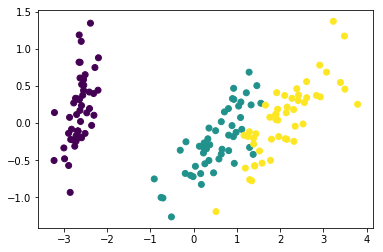

In [156]:
res.transpose()
plt.scatter(res[:,0],res[:,1],c=y)

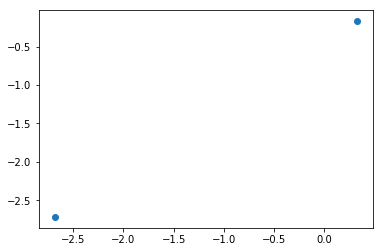

In [160]:
pca = PCA(n_components=2)
xx = pca.fit_transform(x)
#plt.figure(figsize=(5,100))
#plt.imshow(xx)
plt.scatter(xx[0],xx[1])

In [159]:
print(res-xx)

[[ 1.33226763e-15 -6.66133815e-16]
 [ 8.88178420e-16  3.88578059e-16]
 [-4.44089210e-16  4.71844785e-16]
 [ 0.00000000e+00  4.99600361e-16]
 [ 4.44089210e-16  1.22124533e-15]
 [-4.44089210e-16  1.11022302e-15]
 [-4.44089210e-16  9.99200722e-16]
 [ 0.00000000e+00  8.60422844e-16]
 [ 4.44089210e-16  3.33066907e-16]
 [ 0.00000000e+00  3.88578059e-16]
 [-8.88178420e-16  8.88178420e-16]
 [ 0.00000000e+00  1.06165077e-15]
 [ 4.44089210e-16  1.11022302e-16]
 [ 4.44089210e-16  3.33066907e-16]
 [-8.88178420e-16  8.88178420e-16]
 [-8.88178420e-16  1.77635684e-15]
 [-4.44089210e-16  6.66133815e-16]
 [-4.44089210e-16  6.66133815e-16]
 [ 0.00000000e+00  8.88178420e-16]
 [-4.44089210e-16  1.44328993e-15]
 [ 0.00000000e+00  4.44089210e-16]
 [ 0.00000000e+00  1.05471187e-15]
 [ 4.44089210e-16  1.19348975e-15]
 [-4.44089210e-16  2.35922393e-16]
 [ 4.44089210e-16  1.36002321e-15]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  6.93889390e-16]
 [ 0.00000000e+00  7.77156117e-16]
 [ 0.00000000e+00  4

In [23]:
pca = PCA(n_components=21)
pca.fit(x) 

x_restore = np.dot(f[1][:2], vectors[:2]) + a.mean_
print(x_restore)
plt.imshow(x_restore.reshape((40,40)))

[ 8.83472329e-16  3.75995698e-01  4.44625587e+00  1.09502112e+01
  1.26984566e+01  7.45850692e+00  2.58630947e+00  3.12531487e-01
  6.40407395e-03  1.48095445e+00  7.18369117e+00  1.32720738e+01
  1.18177208e+01  7.52148507e+00  2.95254220e+00  2.12808890e-01
  3.26745092e-03  1.21581518e+00  6.44925115e+00  9.72109767e+00
  1.04131199e+01  6.59715835e+00  1.46050654e+00  8.80993756e-02
  3.07317381e-03  1.37904928e+00  7.19943782e+00  1.14025588e+01
  1.36817979e+01  6.17324447e+00  1.37379312e+00  3.08687260e-03
  0.00000000e+00  1.78139635e+00  8.79063545e+00  1.60054855e+01
  1.69047481e+01  5.58363257e+00  4.25574692e-01  0.00000000e+00
  1.31470553e-02  1.37909666e+00  6.58753104e+00  1.47849954e+01
  1.56037752e+01  3.34397877e+00 -1.35603038e+00  1.25525417e-02
  6.79381362e-03  4.18839930e-01  3.87713490e+00  1.27623050e+01
  1.22905717e+01  1.72530987e+00  1.31583293e-01  2.02845131e-01
  1.32621739e-03  3.76651926e-01  5.14164855e+00  1.06098497e+01
  7.70095401e+00  2.38272

ValueError: cannot reshape array of size 64 into shape (40,40)

На основе полученных собственных значений ковариационной матриы $K$ постройте график зависимости покрываемой дисперсии трансформированных данных от количества главных компонент.

# Интерпретация компонент
## Корреляция с исходными признаками
Главные компоненты являются линейными кобинациями исходных признаков. В этой связи необходимо оценить связь каждой компоненты с исходными признаками.

Рассчет взаимосвязи будем проводить с помощью корреляции Пирсона:

\begin{equation}
r_{jk} = \frac{\sum_{i=1}^n (x_{ij} - \bar{x}_j) (x_{ik}' - \bar{x}_k')}{\sqrt{\sum_{i=1}^n (x_{ij} - \bar{x}_j)^2 \sum_{i=1}^n (x_{ik}' - \bar{x}_k')^2}}
\end{equation}

где
$\bar{x}_j$ - среднее значение $j$-го признака,
$\bar{x}_k'$ - среднее значение проекции на $k$-ю главную компоненту,
$n$ - количество объектов.

Отметим, что корреляция Пирсона изменяется от $-1$ до $+1$. Она равна $0$ в случае, когда величины независимы, и $\pm 1$, если они линейно зависимы.

Определите по коэффициентам корреляции, какие признаки в какую компоненту вошли.